# Tyee data to txt

In [110]:
import numpy as np
import pandas as pd
from os import listdir
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context('talk')
palette = itertools.cycle(sns.color_palette('Set2'))

In [2]:
file = '~/sfuvault/Discourse-Lab/Data/The_Tyee_data/the_tyee_posts_preprocessed.csv'
comments = pd.read_csv(file, parse_dates=['created'], infer_datetime_format=True, low_memory=False).dropna()
files = listdir('Keyness/text_2012-2015_ksr')

In [3]:
def fixApostrophes(col):
    """
    Not included: o'clock, o'er, ne'er, e'er, 'tis, 'twas, gov't ?
    """
    contractionmappings = {
        'let\'s' : 'let us',
        'won\'t' : 'will not',
        'can\'t' : 'cannot',
        'shan\'t' : 'shall not',
        '\'s' : ' is', # could also be possessive or has (or does)
        'n\'t' : ' not',
        '\'ll' : ' will', # could also be shall
        '\'m' : ' am',
        '\'re' : ' are',
        '\'d' : ' would', # could also be had or did
        '\'ve' : ' have',
        'ma\'am' : 'madam',
        'y\'all' : 'you all'
    }
    
    col = col.str.replace('\u2019', '\u0027')
    
    for key,value in contractionmappings.items():
        col = col.str.replace(key, value)
        
    return col

In [4]:
subset = comments['message_preprocessed']
fixApostrophes(subset).to_csv('txt.txt', index=False)

In [5]:
for f in files:
    cocaf = pd.read_table('Keyness/text_2012-2015_ksr/'+f, header=None)
    fixApostrophes(cocaf[0]).to_csv('keynessref/'+f+'.txt', index=False)

## Testing stuff

In [174]:
comments[comments['message_preprocessed'].str.contains('billion!')]

,author_email,author_isAnonymous,author_name,created,id,ipAddress,isDeleted,isSpam,message_preprocessed,post_id,thread_id
402,kwd@wordpress.disqus.net,True,KWD,2004-01-13 00:16:05,wp_id=1093,255.255.255.255,False,False,Reporters around the province must be bagged. ...,907862197,1317026130
5225,anonymous@none.disqus.net,True,Anonymous,2004-08-17 19:07:57,wp_id=5952,255.255.255.255,False,False,"RE:Cancerous Journalism Tue., Aug. 17, 2004 By...",907687896,1316506808
5562,the_cove@wordpress.disqus.net,True,the cove,2004-08-25 11:20:38,wp_id=6298,255.255.255.255,False,False,"Tom Sandborn, a spokesperson for the BC Civil ...",907842065,1316971932
27778,jesterjogger@wordpress.disqus.net,True,jesterjogger,2005-06-30 23:10:43,wp_id=28885,207.216.243.139,False,False,Who cares about some f***in bird when gordo an...,907733755,1316655062
31286,jesterjogger@wordpress.disqus.net,True,jesterjogger,2005-08-12 00:01:32,wp_id=32443,207.216.243.139,False,False,As the wise-cracking detective Brisco once wry...,907748497,1316705884
32959,grumpy@wordpress.disqus.net,True,Grumpy,2005-08-31 07:52:53,wp_id=34125,216.113.220.114,False,False,"Ron, the southern USA has just been devestated...",907722135,1316611570
34514,grumpy@wordpress.disqus.net,True,Grumpy,2005-09-20 08:18:31,wp_id=36034,216.113.220.84,False,False,Why look ay Nanimo boondoogle. Vancouver has R...,907721319,1316609102
41882,grumpy@wordpress.disqus.net,True,Grumpy,2005-11-11 04:19:08,wp_id=43432,216.113.220.50,False,False,"Um, like I just have to respond to the previou...",907786831,1316803558
43640,grumpy@wordpress.disqus.net,True,Grumpy,2005-11-28 22:59:35,wp_id=45199,216.113.220.3,False,False,Skeptikool dead on.The real problem is the phi...,907713292,1316584752
52951,grumpy@wordpress.disqus.net,True,Grumpy,2006-02-03 05:01:59,wp_id=54523,216.113.210.91,False,False,"Stump, get a reality check buddy, SkyTrain to ...",907830481,1316933961


In [186]:
test = comments['message_preprocessed'][401:402].values[0]
test

'Reporters around the province must be bagged. Newspapers are full of timelines, character sketches and tons of drama all neatly rolled for audience enjoyment. All we need now are a few plots to get it all growing. But the audience shouldn’t be too snorting mad if a few important bodies aren’t hung out to dry when the final curtain falls on this ‘Who Done It’ mystery. Unfortunately, the writers seem to have missed the seed on a valuable hint dropped by RCMP Sgt. John Ward: “ The value of the illegal marijuana trade alone is estimated to be worth in excess of $6 billion.” Six billion! That’s a lot of dough or pot or cocaine or political payoff. But if we take a deep breath and savour Ward’s statement for a moment some fairly pungent questions arise. Where is all that money coming from? And, who are these law-breaking characters buying six billion dollars worth of drugs? The media is constantly reminding us about hard-core druggies and robberies and car thefts and B and Es, all apparentl

In [187]:
for index,i in enumerate(test.split()):
    if i.find('let') != -1:
        print(index)

180


In [191]:
char = test.split()[180][3]
print(char)
print(char.encode('unicode-escape'))

’
b'\\u2019'


In [192]:
test.split()[180].replace('s', 'z').replace('\u2019', '\u0027')

"let'z"

## Visualization

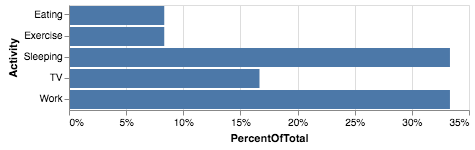

In [8]:
activities = pd.DataFrame({'Activity': ['Sleeping', 'Eating', 'TV', 'Work', 'Exercise'],
                           'Time': [8, 2, 4, 8, 2]})

alt.Chart(activities).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Activity:N'
).transform_window(
    TotalTime='sum(Time)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.Time / datum.TotalTime"
)

In [32]:
file = '~/sfuvault/Discourse-Lab/Data/The_Tyee_data/keyness/tyee_keyness(coca)_with_negative_keyness.txt'
keyness = pd.read_table(file, header=None, skiprows=3, names=['rank', 'frequency', 'pos_neg', 'keyness', 'effect', 'word'])
keyness.head()

,rank,frequency,pos_neg,keyness,effect,word
0,1,70866,+,147124.60,0.0040,bc
1,2,51762,+,111229.84,0.0030,ndp
2,3,43530,+,75342.35,0.0025,canada
3,4,30191,+,62387.84,0.0017,cannot
4,5,25470,+,49642.42,0.0015,liberals


In [41]:
keyness = keyness[keyness['effect'] > 0]

In [85]:
keyness_polarized = pd.DataFrame(keyness['pos_neg'].str.cat(keyness['keyness'].astype('str')).astype('float'))
keyness_polarized['word'] = keyness['word']
keyness_polarized.reset_index(inplace=True)
keyness_polarized

,index,pos_neg,word
0,0,147124.60,bc
1,1,111229.84,ndp
2,2,75342.35,canada
3,3,62387.84,cannot
4,4,49642.42,liberals
5,5,46355.03,campbell
6,6,43755.55,harper
7,7,42602.24,vancouver
8,8,40095.94,government
9,9,35922.34,will


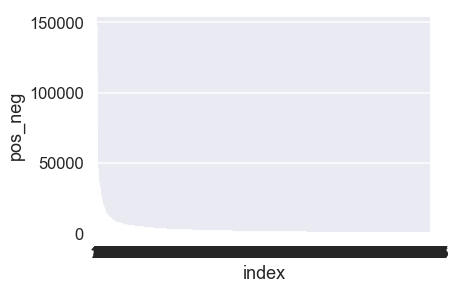

In [111]:
sns.barplot(y='pos_neg', x='index', data=keyness_polarized[keyness_polarized['index'] < 5000], color=next(palette))
# plt.xticks(rotation=40)
# plt.xlabel('')
# plt.ylabel('')
# plt.title('Average number of words per comment, by year of The Tyee comments')

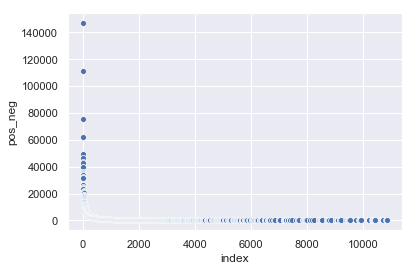

In [106]:
sns.scatterplot(y='pos_neg', x='index', data=keyness_polarized[keyness_polarized['index'] < 10879])

In [44]:
plt.bar(keyness['rank'], keyness['keyness'])
# ax.set_yticks(keyness['rank'])
# plt.set_yticklabels(keyness['word'])
# plt.invert_yaxis()  # labels read top-to-bottom
# plt.set_xlabel('Keyness')

plt.show()

KeyError: 508